# **Key terms**

**ARR-**  Annualized Recurring Revenue.

**Upsell-** Additional revenue over and above base revenue from existing customers.

**Downsell-** The opposite of upsell.

**New-** Revenue from new customers.

**Lost-** Revenue attributable to customers lost.

**GDR (Gross Dollar Retention)-** The percentage of revenue from customers that a company ends up retaining from prior period.

**NDR (Net Dollar Retention)-** The percentage of revenue from customers that a company ends up retaining from prior period + any upsell to new customers.

**Note:**
* For the purpose of this project, we will only calculate dollar retention and not look at pure logo retention.
* Logo retention may be more meaningful for certain sub-sectors, but it is always good to look at dollar retention and not just logo retention.
* We can have a growing free customer base, if you are new service like Quibi (read were a service!).
* We get the idea of why it is important to look at retention in monetary terms.

#**Step 1:** Loading data and libraries

In [ ]:
#loading libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from plotnine import *
from datetime import datetime
import calendar as cd
import gc

#**Step 2:** Lets load the data

In [ ]:
#loading data
df_transactions = pd.read_csv('/content/transactions_v2.csv')

#**Step 3:** Lets explore the data

In [ ]:
df_transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32.0,90.0,298.0,298.0,0.0,20170131.0,20170504.0,0.0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41.0,30.0,149.0,149.0,1.0,20150809.0,20190412.0,0.0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36.0,30.0,180.0,180.0,1.0,20170303.0,20170422.0,0.0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36.0,30.0,180.0,180.0,1.0,20170329.0,20170331.0,1.0
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41.0,30.0,99.0,99.0,1.0,20170323.0,20170423.0,0.0


**Info:**
* As you can see, each line item seems to be a customer/subscription with details about their payment method/plan type, plan days, list price, actual amount paid, whether the subscription has an auto-renewal clause or not, date of the transaction, subscription expiry date and whether the subscription is cancelled or still active.

* For the purpose of this example, we will conduct our analysis on list price as the list price equaled amounts paid for a majority of customers. Depending on the type of business, you may want to perform on either list price and treat differences as overages or perform analysis on actual amount, if a lot of discounts are offered.

**Lets now look at further characteristics of each data point:**

In [ ]:
df_transactions.columns

Index(['msno', 'payment_method_id', 'payment_plan_days', 'plan_list_price',
       'actual_amount_paid', 'is_auto_renew', 'transaction_date',
       'membership_expire_date', 'is_cancel'],
      dtype='object')

In [ ]:
df_transactions.describe().round(2)

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,65013.00,65013.00,65013.00,65013.00,65013.00,65013.00,65013.00,65013.00
mean,37.90,66.17,282.69,282.20,0.79,20168494.71,20171085.76,0.03
std,4.99,102.93,437.14,437.34,0.41,4839.79,2936.66,0.16
min,3.00,0.00,0.00,0.00,0.00,20150101.00,20170227.00,0.00
25%,36.00,30.00,99.00,99.00,1.00,20170301.00,20170410.00,0.00
50%,40.00,30.00,149.00,149.00,1.00,20170311.00,20170421.00,0.00
75%,41.00,30.00,149.00,149.00,1.00,20170323.00,20170501.00,0.00
max,41.00,450.00,2000.00,2000.00,1.00,20170331.00,20270928.00,1.00


In [ ]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65014 entries, 0 to 65013
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    65014 non-null  object 
 1   payment_method_id       65013 non-null  float64
 2   payment_plan_days       65013 non-null  float64
 3   plan_list_price         65013 non-null  float64
 4   actual_amount_paid      65013 non-null  float64
 5   is_auto_renew           65013 non-null  float64
 6   transaction_date        65013 non-null  float64
 7   membership_expire_date  65013 non-null  float64
 8   is_cancel               65013 non-null  float64
dtypes: float64(8), object(1)
memory usage: 4.5+ MB


In [ ]:
df_transactions.isna().any()

msno                      False
payment_method_id          True
payment_plan_days          True
plan_list_price            True
actual_amount_paid         True
is_auto_renew              True
transaction_date           True
membership_expire_date     True
is_cancel                  True
dtype: bool

**We can observe from this that:**

* There are 2 major plan type 38 and 41
* The majority of customers are on 30 days plan
* The plan list price average TWD140, while the actual amount paid averages TWD142

Let's explore this dataset a bit more.

Lets explore the unique values in each key column below:

In [ ]:
print("payment_method_id:", df_transactions["payment_method_id"].unique())
print()
print("plan_list_price", df_transactions["plan_list_price"].unique())
print()
print("is_auto_renew", df_transactions["is_auto_renew"].value_counts(normalize=True))

payment_method_id: [32. 41. 36. 40. 16. 34. 39. 38. 33. 30. 12. 20. 15. 29. 37. 13. 31. 19.
 22. 21. 17. 35. 14. 23. 27. 28. 18.  6. 26.  8. 11.  3. 10. nan]

plan_list_price [2.980e+02 1.490e+02 1.800e+02 9.900e+01 1.788e+03 5.360e+02 1.290e+02
 1.000e+02 8.940e+02 4.800e+02 3.000e+02 4.770e+02 1.299e+03 1.599e+03
 6.990e+02 1.200e+03 0.000e+00 7.990e+02 9.300e+02 6.000e+02 1.000e+00
 3.500e+01 1.399e+03 1.500e+02 1.190e+02 4.470e+02 4.500e+02 2.100e+02
 1.000e+03 1.340e+02 1.200e+02 2.000e+03 4.000e+02 1.310e+02 5.000e+02
 3.500e+02 1.260e+03 1.260e+02 5.960e+02 7.000e+01 2.650e+02 1.150e+03
       nan]

is_auto_renew 1.0    0.786597
0.0    0.213403
Name: is_auto_renew, dtype: float64


**Info:**
* From this we can see that there are a number of datapoint that seem like outliers in both payment method and list price. We will normalize the data for some of these outliers in the following steps.

* We can also see that that 85% of customers are on auto-renewal, while 15% of the customers are on manual renewal.

#**Step 4**: Visually plot data to check for some outliers

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_count : Removed 1 rows containing non-finite values.


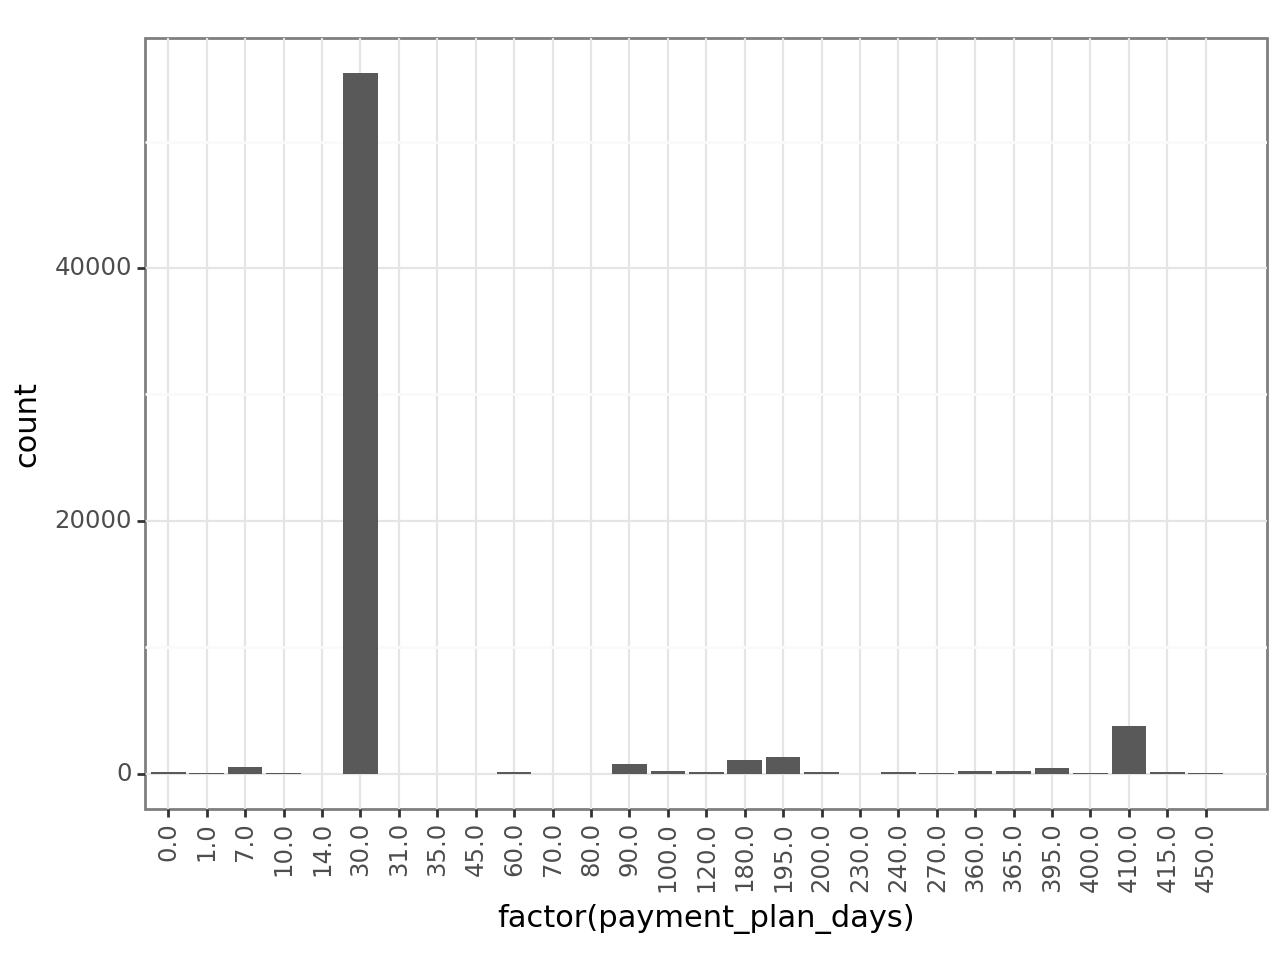

<Figure Size: (640 x 480)>

In [ ]:
#exploring payment plan days
ggplot(data=df_transactions, mapping= aes(x='factor(payment_plan_days)')) \
    + geom_bar() \
    + theme_bw() \
    + theme(axis_text_x = element_text(angle=90))

**From the payment plan days plot, it appears that:**

* Majority of the customers are on a monthly plan (30/31 days) with some being on 7 days plans and there are a few customers that seem to be on a multi-period plan

* The customers with 0 days may be on a trial plan that we may want to exclude from our analysis

I have used ggplot to plot this bar chart. You can easily do it using Seaborn as ggplot seems to have performance issues on Python.

**Let’s visually plot the list price now:**

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_count : Removed 1 rows containing non-finite values.


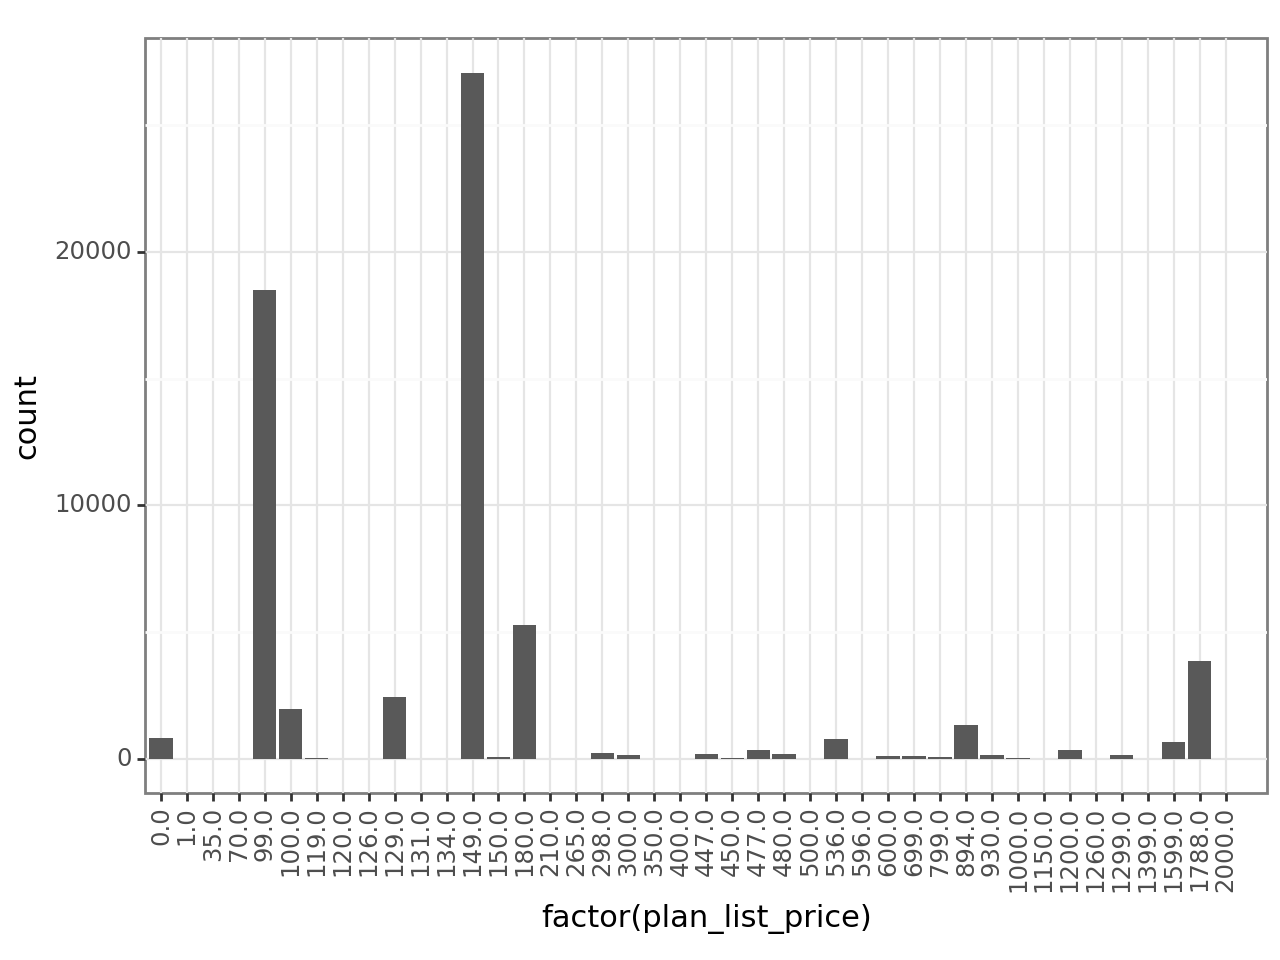

<Figure Size: (640 x 480)>

In [ ]:
#exploring plan list price
ggplot(data=df_transactions, mapping= aes(x='factor(plan_list_price)')) \
    + geom_bar() \
    + theme_bw() \
    + theme(axis_text_x = element_text(angle=90))

**Info:**
* The distribution seems very similar to the plan days and it suggests that the data is for billings

* We need to standardize the plan pricing to either MRR or ARR. For the purpose of this analysis, I will use a very simplified approach for converting the billings to MRR/ARR.

* We will also remove the customers on trial for this analysis

#**Step 5:** Normalizing the data

Let’s remove the plans that are either less than 7 days or have a zero price point.

In [ ]:
df_transactions = df_transactions[df_transactions.plan_list_price > 1]
df_transactions = df_transactions[df_transactions.payment_plan_days > 6]
df_transactions[['plan_list_price', 'payment_plan_days']].describe().round(2)

,plan_list_price,payment_plan_days
count,64174.00,64174.00
mean,286.39,66.65
std,438.78,103.25
min,35.00,7.00
25%,99.00,30.00
50%,149.00,30.00
75%,149.00,30.00
max,2000.00,450.00


**Info:**
* Now that we have removed these outliers from our datable, let’s calculate ARR, using a very simple approach.

In [ ]:
df_transactions['ARR'] = (df_transactions['plan_list_price'] / df_transactions['payment_plan_days']) * 365
df_transactions['ARR'].describe().round(2)

count    64174.00
mean      1602.90
std        322.51
min        604.28
25%       1204.50
50%       1812.83
75%       1812.83
max       2555.00
Name: ARR, dtype: float64

In [ ]:
df_transactions[['ARR']].describe().round(2)

,ARR
count,64174.00
mean,1602.90
std,322.51
min,604.28
25%,1204.50
50%,1812.83
75%,1812.83
max,2555.00


**Info:**
* The average ARR is TWD1,655. There do seem to be some outliers that need to be investigated further.

For the purpose of this example, we will leave these in.

#**Step 6:** Converting date fields to date time and adding datapoint for missing dates

In [ ]:
df_transactions.transaction_date = pd.to_datetime(df_transactions.transaction_date, format = '%Y%m%d')
df_transactions.membership_expire_date = pd.to_datetime(df_transactions.membership_expire_date, format = '%Y%m%d')
df_transactions.head(10)

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,ARR
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32.0,90.0,298.0,298.0,0.0,2017-01-31,2017-05-04,0.0,1208.555556
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41.0,30.0,149.0,149.0,1.0,2015-08-09,2019-04-12,0.0,1812.833333
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36.0,30.0,180.0,180.0,1.0,2017-03-03,2017-04-22,0.0,2190.000000
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36.0,30.0,180.0,180.0,1.0,2017-03-29,2017-03-31,1.0,2190.000000
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41.0,30.0,99.0,99.0,1.0,2017-03-23,2017-04-23,0.0,1204.500000
5,+0KcMm8JNCW08lTp3Lyz5Ger/47u3yj9H2xLf8lyAj8=,41.0,30.0,149.0,149.0,1.0,2015-11-12,2018-06-13,0.0,1812.833333
6,+0MeUJe1cGb4O97gJoTPUPjiONQzi9BmxDuKRZn+E2o=,41.0,30.0,99.0,99.0,1.0,2017-03-13,2017-04-13,0.0,1204.500000
7,+0W3Q9FSw8TLgoNke9JFl6dUeoxAOfuHarEexRPcJsA=,41.0,30.0,99.0,99.0,1.0,2017-03-18,2017-04-18,0.0,1204.500000
8,+0aofSeKQ/F2bhtAGW/zrdrw+lGVV6nmIdt8hJRTR/8=,41.0,30.0,99.0,99.0,1.0,2017-03-16,2017-04-16,0.0,1204.500000
9,+0c0aay0C6GHocNyfqE+46Ih4dYOy2P5xjc0GjGgBTE=,41.0,30.0,149.0,149.0,1.0,2017-03-07,2017-04-07,0.0,1812.833333


Now we need to create a record for each month. Ideally we should be doing this for only multiperiod billings and do not need to for monthly billing but we will run it on all customers

In [ ]:
#check for 2 customers. To be replaced by full transactions
#df_user0 = df_transactions[df_transactions.msno == "LUPRfoE2r3WwVWhYO/TqQhjrL/qP6CO+/ORUlr7yNc0="]
#df_user1 = df_transactions[df_transactions.msno == "YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc="]
#df_user1 = df_user1.append(df_user0)
#df_transactions = df_user1
df_transactions = df_transactions.sort_values(by=['msno', 'transaction_date'])
df_transactions = df_transactions.reset_index()
df_transactions.head()

,index,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,ARR
0,0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32.0,90.0,298.0,298.0,0.0,2017-01-31,2017-05-04,0.0,1208.555556
1,35727,++BQyzVEMoHru900mTyAKpCsKYjXUGdAXylmmiPsbVY=,41.0,30.0,149.0,149.0,1.0,2017-03-31,2017-04-30,0.0,1812.833333
2,28596,++FojTWzKjhz7uxsZXEN3KBpxSmSvPr2j9KEuLzVAm4=,37.0,30.0,149.0,149.0,1.0,2017-03-09,2017-04-08,0.0,1812.833333
3,57194,++GVWCJ/8c4RVSUmn5mrt3VFGLUfmYIGVJ/SHLWPACw=,41.0,30.0,99.0,99.0,1.0,2017-03-13,2017-04-13,0.0,1204.500000
4,35728,++NvYbtVD+fgVuflK0hgYV/Y1WA2aYbmmRbCGAQkdPU=,41.0,30.0,99.0,99.0,1.0,2017-03-04,2017-04-04,0.0,1204.500000


**Info:**
* After converting the date fields into datetime, we need to create a record for each month for multi-period billings so that we have the correct ARR number at the end of each month.

* We will only run this code block for multi-period billing as this is an iterative code and takes up a lot of resources.

Before we do that we need to sort the transaction data.

In [ ]:
df_transactions_g60 = df_transactions[df_transactions['payment_plan_days']>=60]
df_transactions_l60 = df_transactions[df_transactions['payment_plan_days']<60]
#df_transaction_g30.info()

In [ ]:
df_transactions_l60 = df_transactions_l60[['msno', 'transaction_date', 'ARR']]
df_transactions_l60.columns = ['User', 'Date', 'ARR']
#df_transactions_l60.head()

In [ ]:
df_ARR = pd.DataFrame(
    [[t[1], d, t[10]] for t in df_transactions_g60.itertuples(index=False)
     for d in pd.date_range(t[7], t[8], freq='MS')],
    columns=['User', 'Date', 'ARR']
)
df_ARR = df_ARR.append(df_transactions_l60)

<ipython-input-19-156b99766abd>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [ ]:
#df_ARR = df_ARR[df_ARR['Date'].dt.year > 2015]
df_ARR.head()

,User,Date,ARR
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,2017-02-01,1208.555556
1,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,2017-03-01,1208.555556
2,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,2017-04-01,1208.555556
3,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,2017-05-01,1208.555556
4,++iWKkvYK2+byD1UvuVlS/tDUafoUwD5vD11v4ABBO0=,2016-09-01,1591.756098


In [ ]:
df_ARR = df_ARR.groupby(['User', 'Date'], as_index = False).max()
df_ARR = df_ARR.sort_values(by=['User', 'Date'])
#df_ARR

#**Step 7:** Creating a datapoint for inactive months

Before we move on to creating the other data points, let’s delete the unused tables from memory. Pandas does not delete dataframes loaded automatically, therefore it is good to delete unused dataframes.

In [ ]:
del df_transactions_g60
del df_transactions_l60
gc.collect()

38

In [ ]:
del df_transactions
gc.collect()

0

There are multiple ways to create, the missing data point, some people prefer creating a pivot table and then unpivoting it back. I used the same iteration to create the table and then append it to the main table. There is a code block hashed below that uses multi indexing to get to the same result. That code would work, if you have a smaller dataset.

In [ ]:
#df_ARR_temp = pd.DataFrame(df_ARR['User'].unique(), columns = ['User'])
#df_ARR_temp['ARR'] = 0
#df_ARR_temp['mindate'] = df_ARR.Date.min()
#df_ARR_temp['maxdate'] = df_ARR.Date.max()

#df_ARR_temp = pd.DataFrame(
#    [[t[0], d, t[1]] for t in df_ARR_temp.itertuples(index=False)
#     for d in pd.date_range(t[2], t[3], freq='MS')],
#    columns=['User', 'Date', 'ARR']
#)
#uploading the temp file as Kaggle kernel was having issues running the above code
df_ARR_temp = pd.read_csv('/content/df_ARR_temp.csv')

FileNotFoundError: ignored

In [ ]:
#df_ARR = df_ARR.set_index(['User', 'Date'])
#df_ARR = df_ARR.reindex(pd.MultiIndex.from_product(df_ARR.index.levels))
df_ARR = df_ARR.append(df_ARR_temp)
df_ARR['Date'] = df_ARR['Date'].values.astype('datetime64[M]')

NameError: ignored

In [ ]:
#deleting df_ARR_temp
del df_ARR_temp
gc.collect()

In [ ]:
df_ARR = df_ARR.groupby(['User', 'Date'], as_index = False).max()
df_ARR = df_ARR.sort_values(by=['User', 'Date'])
#df_ARR

In [ ]:
df_ARR['ARR'] = df_ARR['ARR'].fillna(0)
df_ARR.reset_index(inplace = True)
df_ARR

Once we have appended the missing months to our main ARR table, lets take the max value for each month so that it takes the actual amount, if there is any otherwise it input a zero. We will also then fill any missing values with zeros and reset the index.

#**Step 8:** Calculating ARR differences from prior month

We will now create a column called ‘Diff’ in our dataframe that will be the difference between the ARR in prior month vs current month. We will create an interim variable called ‘cname’ as temporary column so that we avoid calculating differences between different customers.

In [ ]:
df_ARR['cname'] = df_ARR.User.shift(1).fillna('abc')

In [ ]:
#calculating Diff
df_ARR['Diff'] = df_ARR['ARR'].diff()
df_ARR['Diff'] = np.where(df_ARR['cname'] != df_ARR['User'], 0, df_ARR['Diff'])
df_ARR = df_ARR.drop(['cname'], axis = 1)

In [ ]:
df_ARR['Check'].describe().round(2)

Once we have created the retention categories, we will calculate GDR and NDR, but before that, its always good to check totals, to make sure that there are no errors in calculations.

#**Step 9:** Calculating Upsell, Downsell, New and Lost categories

In [ ]:
#get opening ARR
df_ARR['Diff'] = df_ARR['Diff'].fillna(0)
df_ARR['Beg_ARR'] = df_ARR['ARR'] - df_ARR['Diff']
df_ARR['New'] = np.where(df_ARR['Beg_ARR'] == 0, np.where(df_ARR['Diff'] >0,df_ARR['Diff'], 0),0)
df_ARR['Lost'] = np.where(df_ARR['ARR'] == 0, np.where(df_ARR['Diff'] <0,df_ARR['Diff'], 0),0)
df_ARR['Upsell'] = np.where(df_ARR['Diff'] >0,df_ARR['Diff'] - df_ARR['New'], 0)
df_ARR['Downsell'] = np.where(df_ARR['Diff'] <0,df_ARR['Diff'] - df_ARR['Lost'], 0)
df_ARR['Check'] = df_ARR['Beg_ARR'] + df_ARR['New'] + df_ARR['Lost'] + df_ARR['Upsell'] + df_ARR['Downsell'] \
    - df_ARR['ARR']

df_ARR.head(5)

Our check totals work, so let’s now calculate GDR and NDR.

In [ ]:
df_ARR['GDR'] = df_ARR['Beg_ARR'] + df_ARR['Lost'] + df_ARR['Downsell']
df_ARR['NDR'] = df_ARR['GDR'] + df_ARR['Upsell']
df_ARR['Date'] = df_ARR['Date'].values.astype('datetime64[M]')

df_ARR_summ = df_ARR.groupby(['Date'], as_index = False).sum()
df_ARR_summ = df_ARR_summ.sort_values(by=['Date'])


df_ARR_summ['GDRpct'] = df_ARR_summ['GDR'] / df_ARR_summ['Beg_ARR']
df_ARR_summ['NDRpct'] = df_ARR_summ['NDR'] / df_ARR_summ['Beg_ARR']
df_ARR_summ.head()

#**Step 10:** Let’s plot our retention analysis, finally !!

In [ ]:
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = pyplot.subplots(figsize=(25,8))
g = sns.lineplot(data = df_ARR_summ['NDRpct'], marker='o', sort = False, ax=ax1, color = "b")
g = sns.lineplot(data = df_ARR_summ['GDRpct'], marker='o', sort = False, ax=ax1, color = "r")
ax2 = ax1.twinx()
x_dates = df_ARR_summ['Date'].dt.strftime('%Y-%m').sort_values().unique()
g = sns.barplot(data = df_ARR_summ, x=x_dates, y='ARR', alpha = 0.5, ax=ax2, color = 'y')

There are certain months where retention seem to drop a lot. We will want to explore it further. The code, to the right, will extract the subset of data to be explored further.



In [ ]:
df_ARR['GDRpct'] = df_ARR['GDR'] / df_ARR['Beg_ARR']
df_ARR['NDRpct'] = df_ARR['NDR'] / df_ARR['Beg_ARR']

In [ ]:
#deleting df_ARR_summ
del df_ARR_summ
gc.collect()

Another way to explore it further, is to create a scatterplot - any customer with NDR below 100% should be explored further as an NDR below 100% suggests that you are losing revenue from that customer over time. Let’s create a scatterplot and mark the customers that we want to explore further.

In [ ]:
df_ARR['NDRpctcat'] = np.where(df_ARR['NDRpct']< 1, "Check", "OK")

In [ ]:
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = pyplot.subplots(figsize=(25,8))
g = sns.scatterplot(ax=ax1, data=df_ARR, x = 'ARR', y = 'NDRpct', hue='NDRpctcat', s = 100)

In [ ]:
df_ARR_atdate = df_ARR.loc[(df_ARR['Date'] == '2015-04-01') & (df_ARR['Diff']<0)]
df_ARR_atdate[['User', 'Diff']].round(0)

In [ ]:
df_ARR_1504 = df_ARR_atdate["User"].unique()
df_ARR_1504 = pd.Series(df_ARR_1504)
df_ARR_1504.to_csv('ARR_1504.csv', index = False)

In [ ]:
# deleting the
del df_ARR
del df_ARR_1504
gc.collect()